In [1]:
import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

In [3]:
Auto = load_data('Auto')
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


### (a)

In [7]:
mpg_med = Auto['mpg'].median()
mpg_med

22.75

In [14]:
mpg_above_med = (Auto['mpg'] > mpg_med).astype(int)
mpg_above_med

name
chevrolet chevelle malibu    0
buick skylark 320            0
plymouth satellite           0
amc rebel sst                0
ford torino                  0
                            ..
ford mustang gl              1
vw pickup                    1
dodge rampage                1
ford ranger                  1
chevy s-10                   1
Name: mpg, Length: 392, dtype: int32

### (b)

In [34]:
svm_linear = SVC(C=10, kernel='linear')
kfold = skm.KFold(5, random_state=0, shuffle=True)
grid_linear = skm.GridSearchCV(
    svm_linear,
    {"C": [0.001, 0.01, 0.1, 1, 5, 10, 25]},
    refit=True,
    cv=kfold,
    scoring="accuracy",
)
grid_linear.fit(Auto, mpg_above_med)
grid_linear.best_params_


{'C': 0.1}

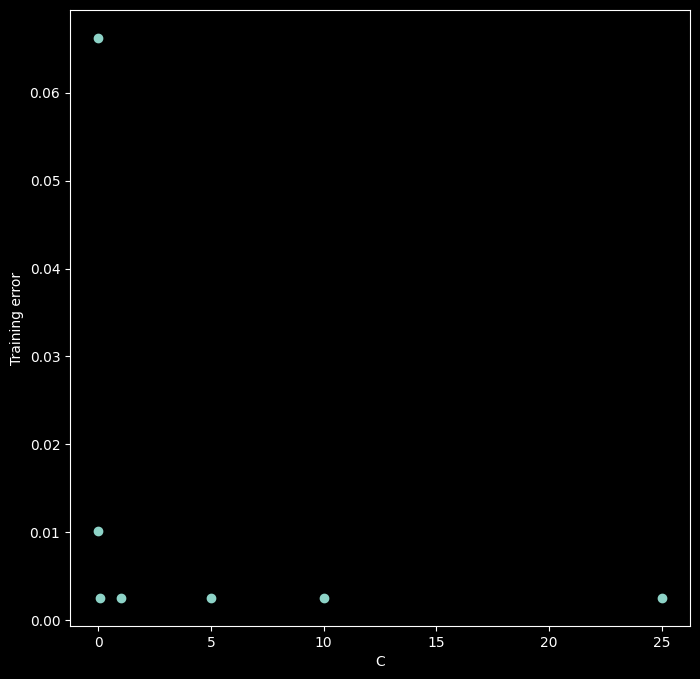

In [35]:
errors = 1 - grid_linear.cv_results_['mean_test_score']
x = grid_linear.cv_results_['param_C']

fig, ax = subplots(figsize=(8, 8))
ax.scatter(x, errors)
ax.set_xlabel('C')
ax.set_ylabel('Training error');

### (c)

In [32]:
svm_poly = SVC(C=10, degree=2, kernel='poly')

grid_poly = skm.GridSearchCV(
    svm_poly,
    {
        "C": [0.001, 0.01, 0.1, 1, 5, 10, 25],
        "degree": [2, 3, 4, 5]

    },
    refit=True,
    cv=kfold,
    scoring="accuracy",
)
grid_poly.fit(Auto, mpg_above_med)
grid_poly.best_params_

{'C': 25, 'degree': 3}

In [39]:
svm_rbf = SVC(C=10, gamma=0.01, kernel='rbf')

grid_rbf = skm.GridSearchCV(
    svm_rbf,
    {
        "C": [0.001, 0.01, 0.1, 1, 5, 10, 25],
        "gamma": [0.001, 0.01, 0.1, 1, 5,]

    },
    refit=True,
    cv=kfold,
    scoring="accuracy",
)
grid_rbf.fit(Auto, mpg_above_med)
grid_rbf.best_params_

{'C': 1, 'gamma': 0.001}

In [44]:
errors_poly =  1 - grid_poly.cv_results_["mean_test_score"]
errors_rbf =   1 - grid_rbf.cv_results_["mean_test_score"]

errors_poly, errors_rbf

# Poly has consistent error rate with tendency to decrease error rate around 0.15.
# Radial SVM have big variance, bug for optimal values the rate is better than obtained by poly.

(array([0.56893866, 0.47925998, 0.31908471, 0.28841285, 0.21444336,
        0.18893216, 0.17361246, 0.16079195, 0.13005518, 0.12752353,
        0.12499189, 0.13012009, 0.12486206, 0.11976631, 0.13002272,
        0.13258682, 0.12229796, 0.12233041, 0.12745862, 0.12239533,
        0.12233041, 0.11979877, 0.11729958, 0.11986368, 0.11723466,
        0.11220383, 0.11476793, 0.11480039]),
 array([0.56893866, 0.56893866, 0.56893866, 0.56893866, 0.56893866,
        0.56893866, 0.56893866, 0.56893866, 0.56893866, 0.56893866,
        0.45420318, 0.56893866, 0.56893866, 0.56893866, 0.56893866,
        0.09175592, 0.25478741, 0.54342746, 0.56384291, 0.56893866,
        0.10963973, 0.23696852, 0.53829925, 0.56384291, 0.56893866,
        0.11733204, 0.23696852, 0.53829925, 0.56384291, 0.56893866,
        0.11476793, 0.23696852, 0.53829925, 0.56384291, 0.56893866]))

### (d)

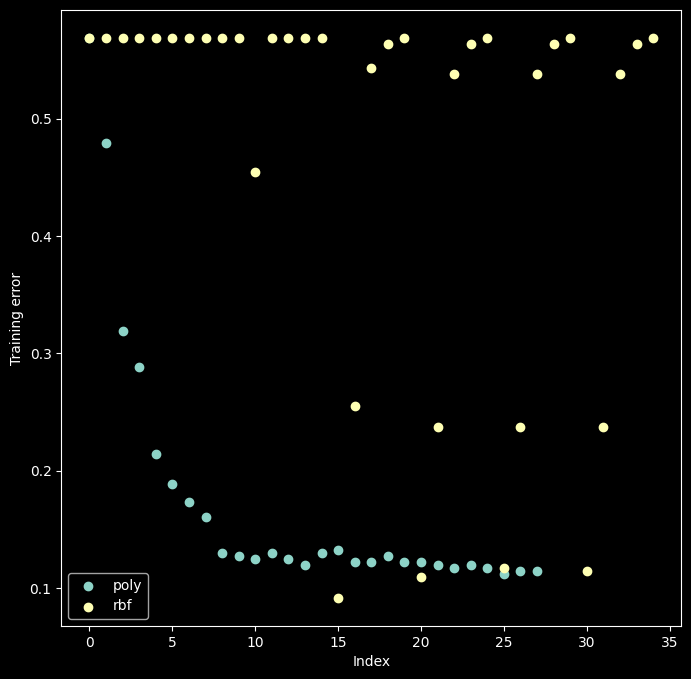

In [45]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(range(len(errors_poly)), errors_poly, label='poly')
ax.scatter(range(len(errors_rbf)), errors_rbf, label='rbf')
ax.set_xlabel('Index')
ax.set_ylabel('Training error')
ax.legend()

c:\Users\User\Documents\afeka\msc-assignments\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\User\Documents\afeka\msc-assignments\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\User\Documents\afeka\msc-assignments\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\User\Documents\afeka\msc-assignments\.venv\Lib\site-packages\ISLP\svm.py:136: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_ = (2 * (Y[svm.support_] == svm.classes_[1]) - 1)


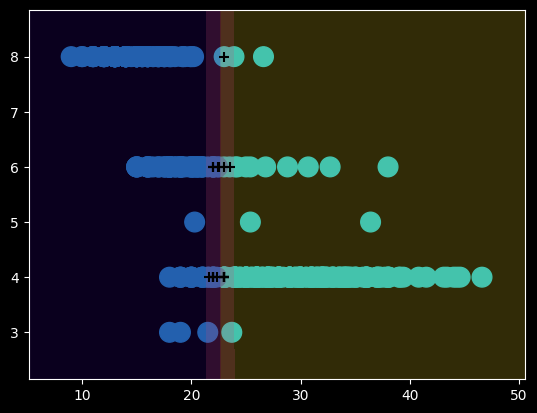

In [ ]:
# Linear: mpg ~ cylinders
plot_svm(Auto, mpg_above_med, grid_linear.best_estimator_, features=(0,1))

c:\Users\User\Documents\afeka\msc-assignments\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\User\Documents\afeka\msc-assignments\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\User\Documents\afeka\msc-assignments\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\User\Documents\afeka\msc-assignments\.venv\Lib\site-packages\ISLP\svm.py:136: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_ = (2 * (Y[svm.support_] == svm.classes_[1]) - 1)


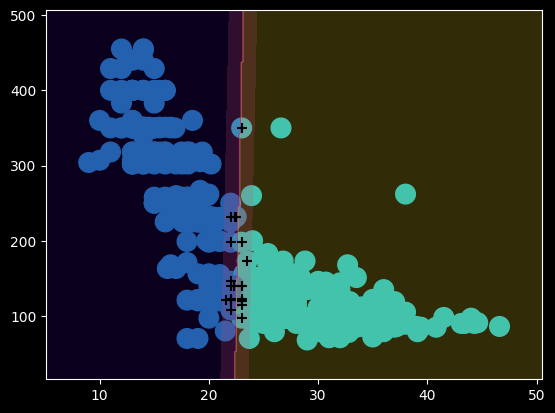

In [63]:
# Linear: mpg ~ displacement
plot_svm(Auto, mpg_above_med, grid_linear.best_estimator_, features=(0,2))

c:\Users\User\Documents\afeka\msc-assignments\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\User\Documents\afeka\msc-assignments\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\User\Documents\afeka\msc-assignments\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\User\Documents\afeka\msc-assignments\.venv\Lib\site-packages\ISLP\svm.py:136: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_ = (2 * (Y[svm.support_] == svm.classes_[1]) - 1)


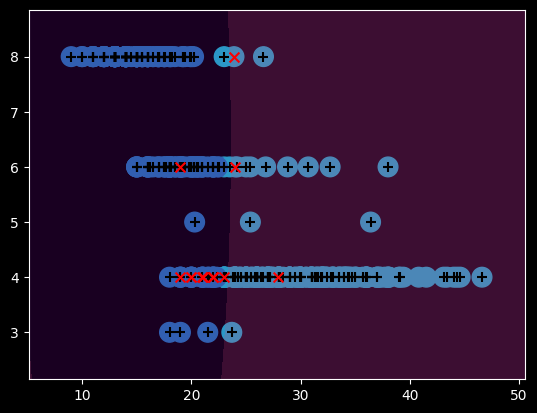

In [ ]:
# RBF: mpg ~ cylinders
plot_svm(Auto, mpg_above_med, grid_rbf.best_estimator_, features=(0,1))

c:\Users\User\Documents\afeka\msc-assignments\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\User\Documents\afeka\msc-assignments\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\User\Documents\afeka\msc-assignments\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\User\Documents\afeka\msc-assignments\.venv\Lib\site-packages\ISLP\svm.py:136: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_ = (2 * (Y[svm.support_] == svm.classes_[1]) - 1)


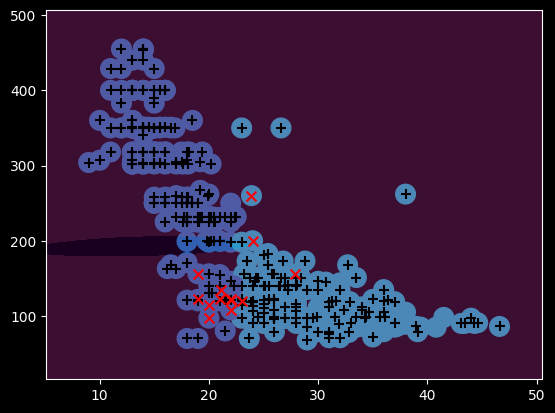

In [64]:
# RBF: mpg ~ displacement
plot_svm(Auto, mpg_above_med, grid_rbf.best_estimator_, features=(0,2))

c:\Users\User\Documents\afeka\msc-assignments\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\User\Documents\afeka\msc-assignments\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\User\Documents\afeka\msc-assignments\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\User\Documents\afeka\msc-assignments\.venv\Lib\site-packages\ISLP\svm.py:136: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_ = (2 * (Y[svm.support_] == svm.classes_[1]) - 1)


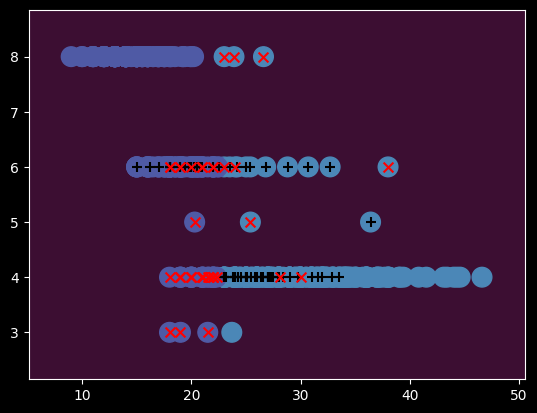

In [62]:
# POLY: mpg ~ cylinders
plot_svm(Auto, mpg_above_med, grid_poly.best_estimator_, features=(0,1))